# <span style="color:DarkGreen"> Pandas Notebook 2, ATM350 Spring 2022 </span>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
file = '/spare11/atm350/common/data/alb2021.txt'

In [2]:
# Shows Raw Data
fileObj = open(file)
nLines = 5
for n in range(nLines):
    line = fileObj.readline()
    print(line)

YYYYMMDD MAX MIN AVG DEP HDD CDD  WTR  SNW DPTH AVGW MW DIR MIN PSBL S-S WX    SPD DR2

20210101  32  16  24   0  41   0 0.26  1.5    0  2.2  9 280   M    M   6 146    12 280

20210102  40  29  35  12  30   0 0.45    T    1  8.1 26 270   M    M   8 146    36 290

20210102  33  28  31   8  34   0 0.19  2.7    T  3.4 10 130   M    M  10 1      14 130

20210104  34  28  31   8  34   0 0.04  0.4    3  2.9  8 330   M    M  10 16     10 330



In [3]:
# Establishing Bounds
df = pd.read_csv(file, delim_whitespace = True, dtype='str')

nRows = df.shape[0]
print ("Number of rows = %d" % nRows )
nCols = df.shape[1]
print ("Number of columns = %d" % nCols)

date = df['YYYYMMDD']
date = pd.to_datetime(date,format="%Y%m%d")

maxT = df['MAX'].astype("float32")
minT = df['MIN'].astype("float32")

Number of rows = 365
Number of columns = 19


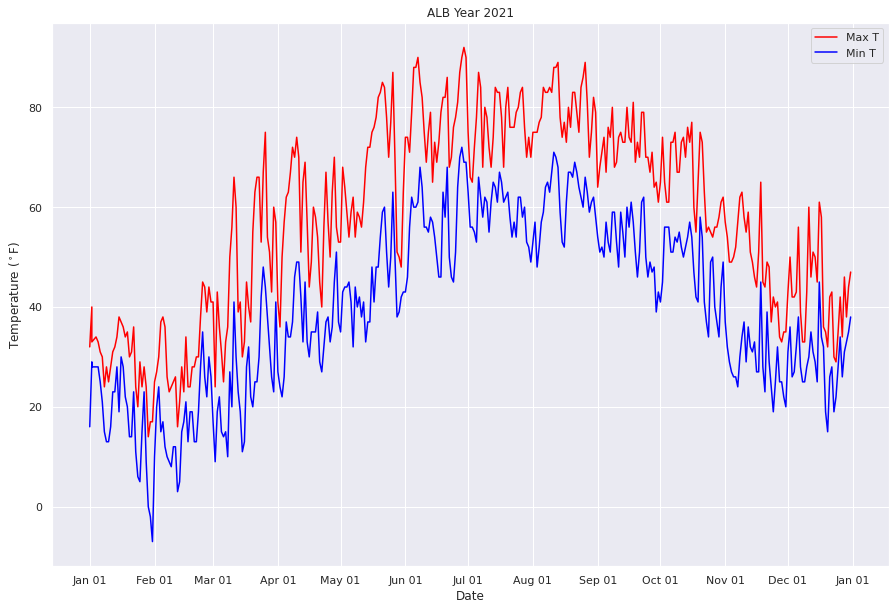

In [4]:
# Imports Commands introduced in the Pandas 1 Notebook.
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator

# Plots Maximum and Minimum Temperatures with all the "Bells and Whistles"
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, maxT, color='red',label = "Max T")
ax.plot (date, minT, color='blue', label = "Min T")
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

In [5]:
# Show the Organized Data so we can read it in and find what value "T" is located in
df

,YYYYMMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
0,20210101,32,16,24,0,41,0,0.26,1.5,0,2.2,9,280,M,M,6,146,12,280
1,20210102,40,29,35,12,30,0,0.45,T,1,8.1,26,270,M,M,8,146,36,290
2,20210102,33,28,31,8,34,0,0.19,2.7,T,3.4,10,130,M,M,10,1,14,130
3,20210104,34,28,31,8,34,0,0.04,0.4,3,2.9,8,330,M,M,10,16,10,330
4,20210105,33,28,31,8,34,0,T,T,1,5.8,13,360,M,M,10,1,18,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,34,26,30,3,35,0,T,T,0,6.1,18,280,M,M,9,4,23,290
361,20211228,46,31,39,12,26,0,0.05,0.3,T,6.7,23,270,M,M,9,16,34,290
362,20211229,38,33,36,9,29,0,0.01,0.1,T,1.0,5,340,M,M,10,12,6,350
363,20211230,44,35,40,13,25,0,0.01,0.0,0,1.9,7,320,M,M,10,12,9,140


In [6]:
# Defining a dataseries called precip so we can alter the "T" values in the precip column.
precip = df['WTR']
precip

0      0.26
1      0.45
2      0.19
3      0.04
4         T
       ... 
360       T
361    0.05
362    0.01
363    0.01
364    0.08
Name: WTR, Length: 365, dtype: object

In [7]:
# Dataframe display with only when precip. = T.
traceDays = df[precip=='T']
traceDays

,YYYYMMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
4,20210105,33,28,31,8,34,0,T,T,1,5.8,13,360,M,M,10,1,18,360
5,20210106,31,25,28,5,37,0,T,T,1,9.0,15,300,M,M,10,19,300,NaN
10,20210111,28,16,22,0,43,0,T,T,T,1.9,7,160,M,M,10,1,9,150
11,20210112,31,23,27,5,38,0,T,T,T,3.4,8,140,M,M,10,1,11,150
12,20210113,32,23,28,6,37,0,T,T,T,5.2,12,170,M,M,9,1,15,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,20211210,43,28,36,4,29,0,T,T,1,6.6,16,170,M,M,9,22,150,NaN
345,20211212,46,35,41,9,24,0,T,T,0,13.3,33,280,M,M,4,1,44,270
350,20211217,58,34,46,16,19,0,T,0.0,0,13.1,26,270,M,M,5,38,270,NaN
355,20211222,43,28,36,7,29,0,T,T,0,12.0,26,280,M,M,7,18,37,290


In [8]:
print (df[precip=='T'].shape)
numTraceDays = df[precip == 'T'].shape[0]
print ("The total # of days in Albany in 2021 that had a trace of precipitation was %d" % numTraceDays) #%d - means to express value as an integer. 

(70, 19)
The total # of days in Albany in 2021 that had a trace of precipitation was 70


## We need to modify the dataframe where 'T' is changed to 0.00.
###### Getting back to our task of converting precip amounts from strings to floating point numbers, one thing we could do is to create a new array and populate it via a loop, where we'd use an `if-else` logical test to check for Trace values and set the precip value to 0.00 for each day accordingly.
See https://stackoverflow.com/questions/49154068/fixing-a-typeerror-when-using-pandas-after-replacing-a-string-with-a-floating-po?rq=1 

``` 
df.loc[df['WTR'] =='T', ['WTR']] = '0.00'
```

In [9]:
# Creates a Truth Table where, True = 'T'
df['WTR'] == 'T'

0      False
1      False
2      False
3      False
4       True
       ...  
360     True
361    False
362    False
363    False
364    False
Name: WTR, Length: 365, dtype: bool

In [10]:
# Displays all rows that are True.
df.loc[df['WTR'] == 'T']

,YYYYMMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
4,20210105,33,28,31,8,34,0,T,T,1,5.8,13,360,M,M,10,1,18,360
5,20210106,31,25,28,5,37,0,T,T,1,9.0,15,300,M,M,10,19,300,NaN
10,20210111,28,16,22,0,43,0,T,T,T,1.9,7,160,M,M,10,1,9,150
11,20210112,31,23,27,5,38,0,T,T,T,3.4,8,140,M,M,10,1,11,150
12,20210113,32,23,28,6,37,0,T,T,T,5.2,12,170,M,M,9,1,15,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,20211210,43,28,36,4,29,0,T,T,1,6.6,16,170,M,M,9,22,150,NaN
345,20211212,46,35,41,9,24,0,T,T,0,13.3,33,280,M,M,4,1,44,270
350,20211217,58,34,46,16,19,0,T,0.0,0,13.1,26,270,M,M,5,38,270,NaN
355,20211222,43,28,36,7,29,0,T,T,0,12.0,26,280,M,M,7,18,37,290


In [11]:
# Returns only specific column
df.loc[df['WTR'] =='T', ['WTR']]

,WTR
4,T
5,T
10,T
11,T
12,T
...,...
343,T
345,T
350,T
355,T


In [12]:
# Changes all values of 'T' to 0.00 in the WTR column
df.loc[df['WTR'] =='T', ['WTR']] = 0.00
df['WTR']

0      0.26
1      0.45
2      0.19
3      0.04
4       0.0
       ... 
360     0.0
361    0.05
362    0.01
363    0.01
364    0.08
Name: WTR, Length: 365, dtype: object

In [13]:
# Returns only specific row.
jan05 = df['YYYYMMDD'] == '20210105'
df[jan05]

,YYYYMMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
4,20210105,33,28,31,8,34,0,0.0,T,1,5.8,13,360,M,M,10,1,18,360


In [14]:
# Converts 0.00 from a inetger to a float!
precip = df['WTR'].astype("float32")
precip

0      0.26
1      0.45
2      0.19
3      0.04
4      0.00
       ... 
360    0.00
361    0.05
362    0.01
363    0.01
364    0.08
Name: WTR, Length: 365, dtype: float32

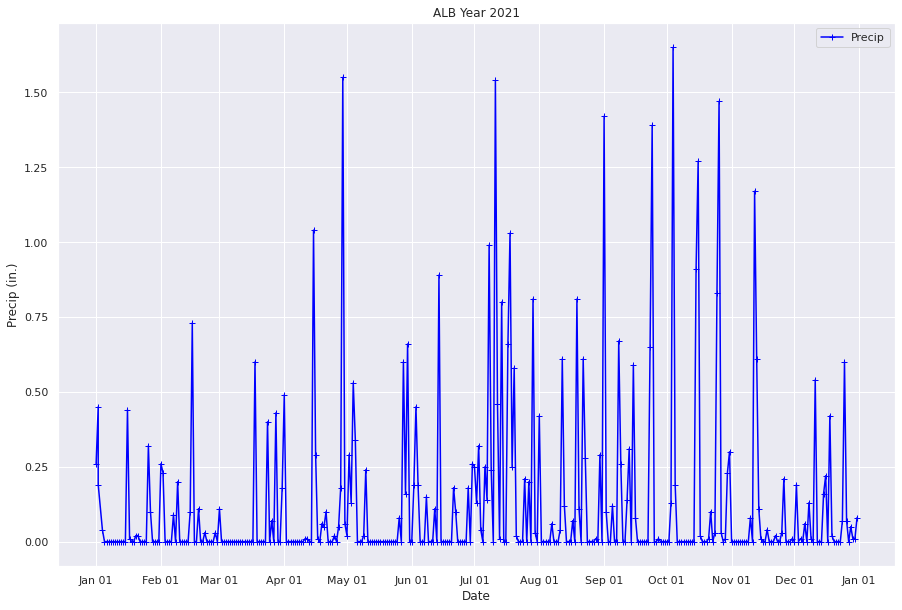

In [15]:
#Plot precipitation every day
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, precip, color='blue', marker='+',label = "Precip")
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Precip (in.)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

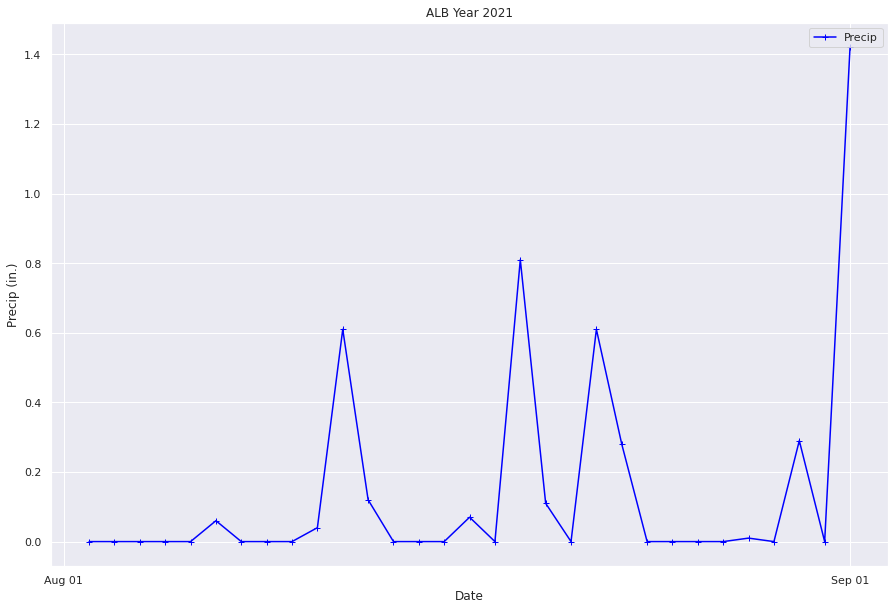

In [16]:
# Specific Time Period
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date[213:244], precip[213:244], color='blue', marker='+',label = "Precip")
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Precip (in.)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

In [17]:
# Outputs a table of days with precip amounts of at least 1.00"
RainyDays = df[precip>=1.00]
RainyDays

,YYYYMMDD,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,AVGW,MW,DIR,MIN.1,PSBL,S-S,WX,SPD,DR2
104,20210415,57,33,45,-3,20,0,1.04,T,0,8.1,20,150,M,M,10,1,25,150
118,20210429,56,51,54,1,11,0,1.55,0.0,0,5.1,15,310,M,M,10,1,19,320
191,20210711,72,55,64,-9,1,0,1.54,0.0,0,2.5,10,210,M,M,8,1,13,160
198,20210718,68,61,65,-9,0,0,1.03,0.0,0,7.0,15,350,M,M,10,1,21,350
243,20210901,64,54,59,-10,6,0,1.42,0.0,0,4.2,15,360,M,M,10,1,19,20
266,20210924,70,50,60,0,5,0,1.39,0.0,0,4.2,14,160,M,M,6,13,18,150
276,20211004,61,56,59,3,6,0,1.65,0.0,0,2.0,7,340,M,M,10,1,9,20
288,20211016,77,54,66,15,0,1,1.27,0.0,0,11.1,28,260,M,M,8,1,39,240
298,20211026,54,50,52,4,13,0,1.47,0.0,0,11.4,20,360,M,M,10,1,27,360
315,20211112,59,36,48,6,17,0,1.17,0.0,0,7.8,22,270,M,M,7,1,28,110


In [18]:
# Outputs amount of days where precip > or =  1.
numRainyDays = RainyDays.shape[0]
print ("The total # of days in Albany in 2021 that had at least 1.00\" of precip was %d" % numRainyDays)

The total # of days in Albany in 2021 that had at least 1.00" of precip was 10


In [19]:
# Adding all precipitation values every day of the year.
precipTotal = precip.cumsum()
precipTotal

0       0.260000
1       0.710000
2       0.900000
3       0.940000
4       0.940000
         ...    
360    45.209995
361    45.259995
362    45.269993
363    45.279991
364    45.359993
Name: WTR, Length: 365, dtype: float32

### One of the methods available to us in a Pandas DataSeries is `values`. Let's display it:

In [20]:
precipTotal.values

array([ 0.26     ,  0.71     ,  0.9      ,  0.94     ,  0.94     ,
        0.94     ,  0.94     ,  0.94     ,  0.94     ,  0.94     ,
        0.94     ,  0.94     ,  0.94     ,  0.94     ,  0.94     ,
        1.38     ,  1.39     ,  1.39     ,  1.39     ,  1.41     ,
        1.43     ,  1.43     ,  1.43     ,  1.43     ,  1.43     ,
        1.75     ,  1.85     ,  1.85     ,  1.85     ,  1.85     ,
        1.85     ,  2.1100001,  2.3400002,  2.3400002,  2.3400002,
        2.3400002,  2.3400002,  2.43     ,  2.43     ,  2.63     ,
        2.63     ,  2.63     ,  2.63     ,  2.63     ,  2.63     ,
        2.73     ,  3.46     ,  3.46     ,  3.46     ,  3.57     ,
        3.57     ,  3.57     ,  3.6      ,  3.6      ,  3.6      ,
        3.6      ,  3.6      ,  3.6299999,  3.6299999,  3.7399998,
        3.7399998,  3.7399998,  3.7399998,  3.7399998,  3.7399998,
        3.7399998,  3.7399998,  3.7399998,  3.7399998,  3.7399998,
        3.7399998,  3.7399998,  3.7399998,  3.7399998,  3.7399

### Exercise: It's an array! So, let's print out the last element of the array. What index # can we use?

In [21]:
# %load '/spare11/atm350/common/mar10/02d.py'
# Print out the value of the last element in the array
precipTotal.values[-1]


45.359993

### Plot the timeseries of the cumulative precip for Albany over the year.

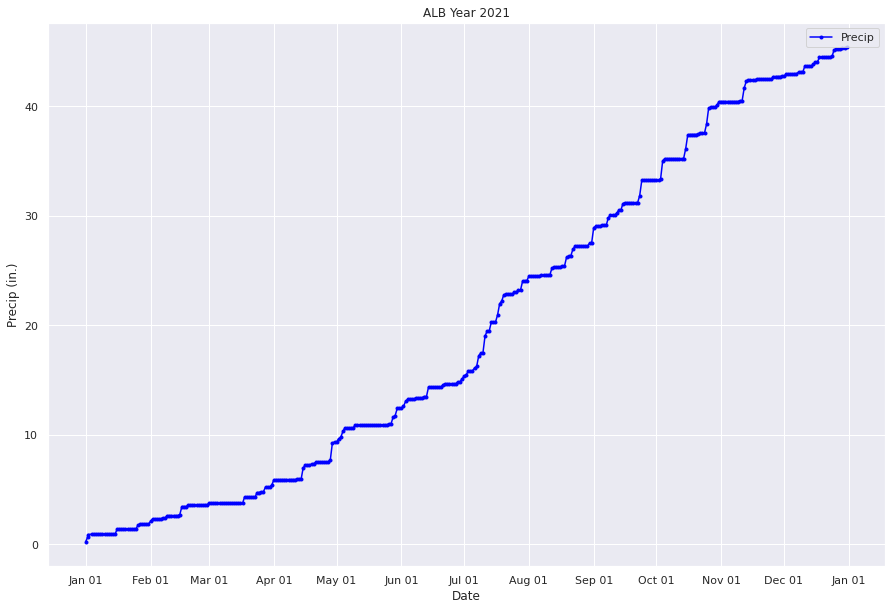

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, precipTotal, color='blue', marker='.',label = "Precip")
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Precip (in.)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

# Pandas has a plethora of statistical analysis methods to apply on tabular data. An excellent summary method is `describe`.

In [23]:
maxT.describe()

count    365.000000
mean      58.164383
std       19.260654
min       14.000000
25%       42.000000
50%       61.000000
75%       74.000000
max       92.000000
Name: MAX, dtype: float64

In [24]:
minT.describe()

count    365.000000
mean      39.904110
std       17.167061
min       -7.000000
25%       26.000000
50%       41.000000
75%       54.000000
max       72.000000
Name: MIN, dtype: float64

In [25]:
precip.describe()

count    365.000000
mean       0.124274
std        0.278714
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        1.650000
Name: WTR, dtype: float64

## Exercise: Why is the mean 0.12, but the median 0.00? Can you write a code cell that answers this question?
Hint: determine how many days had a trace or less of precip. 
1. First, express the condition where precip is equal to 0.00.
2. Then, determine the # of rows of that resulting series.

In [26]:
# %load /spare11/atm350/common/mar10/02e.py

### We'll wrap up by calculating and then plotting *rolling means* over a period of days in the year, in order to smooth out the day-to-day variations.

First, let's replot the max and min temperature trace for the entire year, day-by-day.

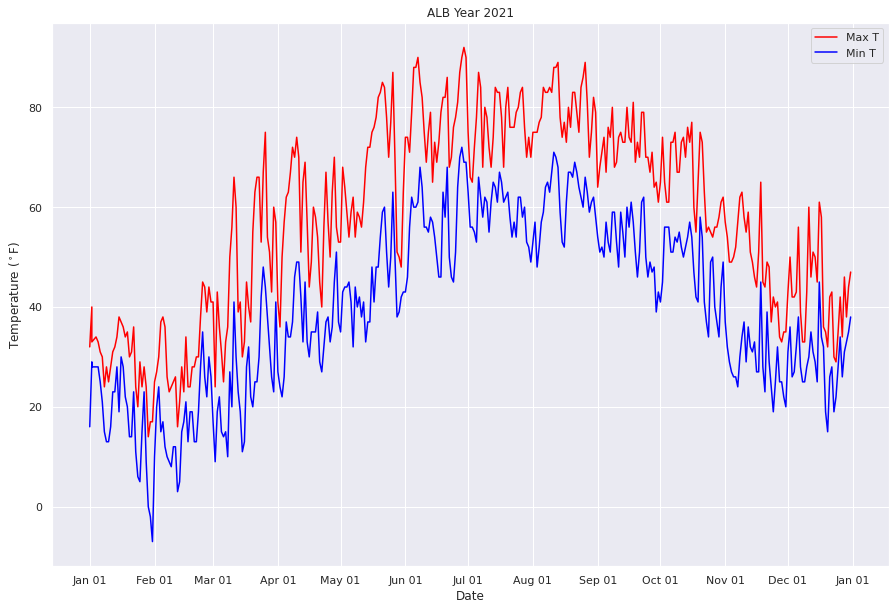

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, maxT, color='red',label = "Max T")
ax.plot (date, minT, color='blue', label = "Min T")
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

Now, let's calculate and plot the daily mean temperature.

In [28]:
meanT = (maxT + minT) / 2.

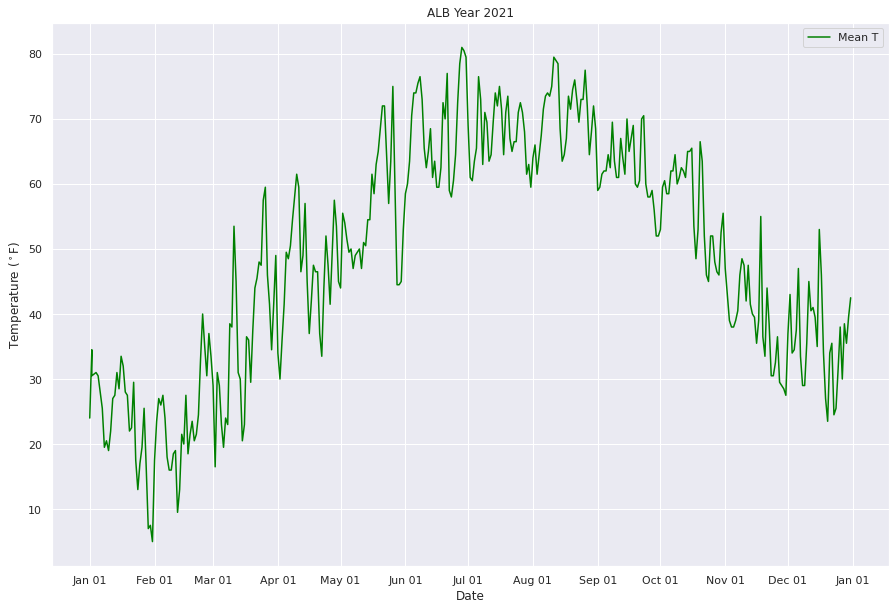

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, meanT, color='green',label = "Mean T")
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

Next, let's use Pandas' `rolling` method to calculate the mean over a specified number of days. We'll center the window at the midpoint of each period (thus, for a 30-day window, the first plotted point will be on Jan. 16 ... covering the Jan. 1 --> Jan. 30 timeframe.

In [30]:
meanTr5 = meanT.rolling(window=5, center=True)
meanTr10 = meanT.rolling(window=10, center=True)
meanTr15 = meanT.rolling(window=15, center=True)
meanTr30 = meanT.rolling(window=30, center=True)

In [31]:
meanTr30.mean()

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
360   NaN
361   NaN
362   NaN
363   NaN
364   NaN
Length: 365, dtype: float64

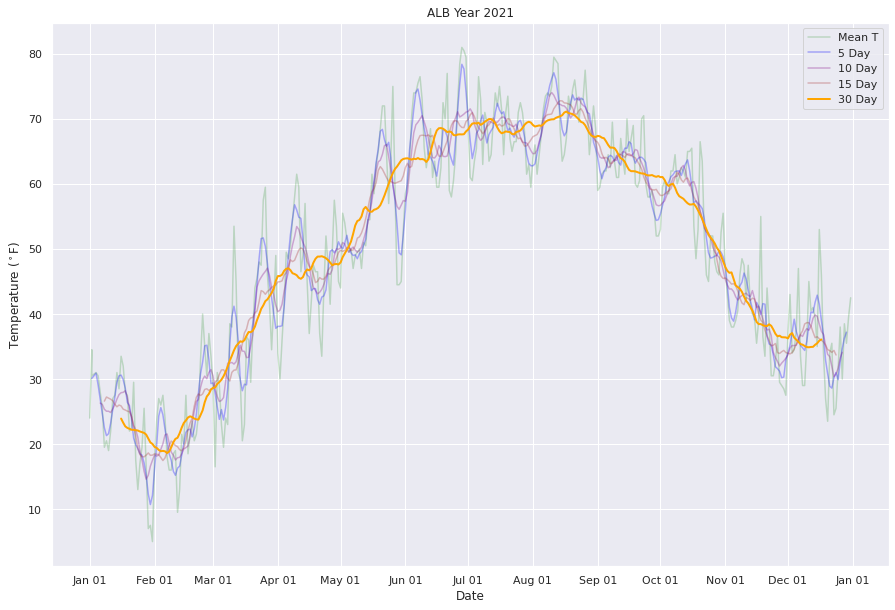

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, meanT, color='green',label = "Mean T",alpha=0.2)
ax.plot (date, meanTr5.mean(), color='blue',label = "5 Day", alpha=0.3)
ax.plot (date, meanTr10.mean(), color='purple',label = "10 Day", alpha=0.3)
ax.plot (date, meanTr15.mean(), color='brown',label = "15 Day", alpha=0.3)
ax.plot (date, meanTr30.mean(), color='orange',label = "30 Day", alpha=1.0, linewidth=2)
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")

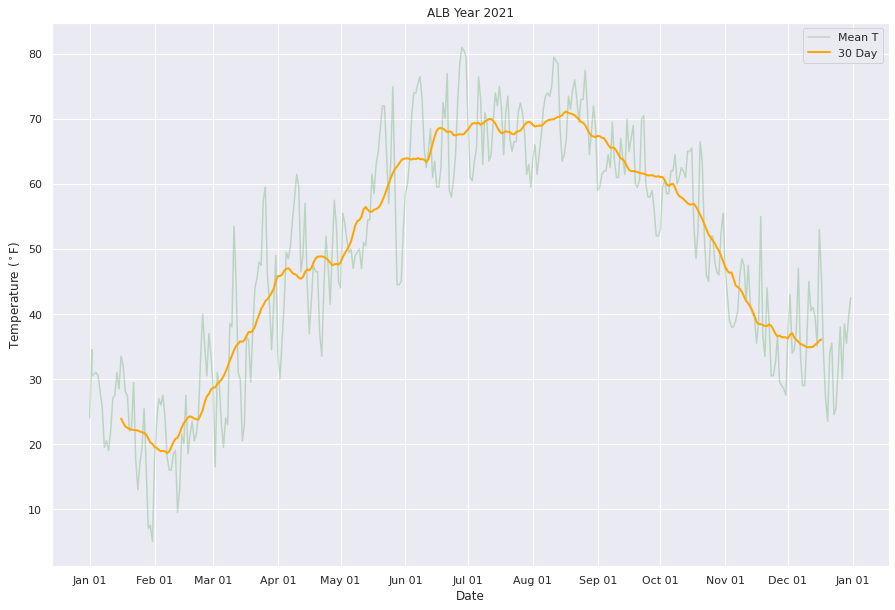

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (date, meanT, color='green',label = "Mean T",alpha=0.2)
ax.plot (date, meanTr30.mean(), color='orange',label = "30 Day", alpha=1.0, linewidth=2)
ax.set_title ("ALB Year 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)' )
ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.legend (loc="best")